# Task 1
1. Operational teams rely heavily on KPIs like on-time collection and on-time delivery to gauge carrier performance. What percentage of shipments met the on-time delivery threshold (arriving no later than 30 minutes past the scheduled delivery window) between October 1st and December 31st, 2023? Please outline your assumptions.

In [94]:
#Assumptions
#1)Each SHIPMENT_NUMBER is unique and correctly identifies a single shipment across both datasets.
#2)The provided shipment bookings and GPS data are accurate, complete, and correctly represent the shipment activities within the specified period.
#3)The RECORD_TIMESTAMP in the GPS data reflects the actual time when the location was recorded so considering that assumption was made max function for RECORD_TIMESTAM would give confirmation of shipment delivery as it is historical data so max RECORD_TIMESTAM for shipment would be shipment delivered to its destination.
#4)Missing data (e.g., missing GPS records for some shipments) are assumed to be handled appropriately, ensuring that missing data do not skew the analysis results significantly.
#5)The chosen metrics (on-time delivery, early delivery, late delivery) accurately reflect the performance and are sufficient to gauge the delivery reliability.
#6)Notification thresholds for missed deliveries are assumed to be within 30 minutes, following industry standards upheld by leading courier companies like UPS, DHL, and FedEx."

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from scipy.stats import spearmanr
from geopy.distance import distance


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



# Load the datasets
shipment_bookings = pd.read_excel(r"file:///Users/ruturajabnave/Downloads/Shipment_bookings.xlsx")
gps_data = pd.read_excel(r"file:///Users/ruturajabnave/Downloads/GPS_data.xlsx")


In [178]:
#Exploring data
shipment_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PROJECT_ID                          3245 non-null   object 
 1   SHIPMENT_NUMBER                     3245 non-null   object 
 2   CARRIER_DISPLAY_ID                  3245 non-null   object 
 3   VEHICLE_SIZE                        3245 non-null   object 
 4   VEHICLE_BUILD_UP                    3245 non-null   object 
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object 
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object 
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64
 9   LAST_DELIVERY_LATITUDE              3245 non-null   float64
 10  LAST_DELIVERY_LONGITUDE             3245 non-null   float64
 11  FIRST_COLLECTION_SCHEDULE_EARLIEST  3245 no

In [179]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641662 entries, 0 to 641661
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SHIPMENT_NUMBER   641662 non-null  object 
 1   LAT               641662 non-null  float64
 2   LON               641662 non-null  float64
 3   RECORD_TIMESTAMP  641662 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.6+ MB


In [180]:
shipment_bookings.shape

(3245, 15)

In [181]:
gps_data.shape

(641662, 4)

In [182]:
# Merge GPS data with shipment bookings on SHIPMENT_NUMBER
merged_data = pd.merge(gps_data, shipment_bookings, on='SHIPMENT_NUMBER')

In [183]:
#Exploring merged dataset
merged_data.shape

(641662, 18)

In [184]:
#Check null values
merged_data.isnull().sum()

SHIPMENT_NUMBER                         0
LAT                                     0
LON                                     0
RECORD_TIMESTAMP                        0
PROJECT_ID                              0
CARRIER_DISPLAY_ID                      0
VEHICLE_SIZE                            0
VEHICLE_BUILD_UP                        0
FIRST_COLLECTION_POST_CODE            349
LAST_DELIVERY_POST_CODE               528
FIRST_COLLECTION_LATITUDE               0
FIRST_COLLECTION_LONGITUDE              0
LAST_DELIVERY_LATITUDE                  0
LAST_DELIVERY_LONGITUDE                 0
FIRST_COLLECTION_SCHEDULE_EARLIEST      0
FIRST_COLLECTION_SCHEDULE_LATEST        0
LAST_DELIVERY_SCHEDULE_EARLIEST         0
LAST_DELIVERY_SCHEDULE_LATEST           0
dtype: int64

In [185]:
merged_data.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP,PROJECT_ID,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09T19:25:00.000+0100,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,MITCHELSTOWN,53.293393,-1.074008,52.276579,-8.258109,2023-10-09T00:00:00.000Z,2023-10-09T23:59:00.000Z,2023-10-10T11:25:00.000Z,2023-10-10T11:55:00.000Z
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09T19:40:00.000+0100,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,MITCHELSTOWN,53.293393,-1.074008,52.276579,-8.258109,2023-10-09T00:00:00.000Z,2023-10-09T23:59:00.000Z,2023-10-10T11:25:00.000Z,2023-10-10T11:55:00.000Z
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09T19:55:00.000+0100,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,MITCHELSTOWN,53.293393,-1.074008,52.276579,-8.258109,2023-10-09T00:00:00.000Z,2023-10-09T23:59:00.000Z,2023-10-10T11:25:00.000Z,2023-10-10T11:55:00.000Z
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09T20:10:00.000+0100,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,MITCHELSTOWN,53.293393,-1.074008,52.276579,-8.258109,2023-10-09T00:00:00.000Z,2023-10-09T23:59:00.000Z,2023-10-10T11:25:00.000Z,2023-10-10T11:55:00.000Z
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09T20:25:00.000+0100,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,MITCHELSTOWN,53.293393,-1.074008,52.276579,-8.258109,2023-10-09T00:00:00.000Z,2023-10-09T23:59:00.000Z,2023-10-10T11:25:00.000Z,2023-10-10T11:55:00.000Z


In [186]:
# group data & take max to know latest location of shipment

grouped_df = merged_data.groupby(['SHIPMENT_NUMBER']).agg({'RECORD_TIMESTAMP':'max'}).reset_index()


In [187]:
#This dataframe gives latest location of shipment vehicle as is most recent timestamp of vehicle 
grouped_df

,SHIPMENT_NUMBER,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,2023-10-11T11:50:00.000+0100
1,SEZHUK-230919-245487,2023-11-30T15:59:00.000Z
2,SEZHUK-230919-245488,2023-10-12T13:08:00.000+0100
3,SEZHUK-230919-245489,2023-11-09T17:51:00.000Z
4,SEZHUK-230919-245490,2023-11-02T16:29:00.000Z
...,...,...
3240,SEZHUK-231228-277315,2023-12-30T09:41:00.000Z
3241,SEZHUK-231228-277382,2023-12-29T19:31:00.000Z
3242,SEZHUK-231228-277383,2023-12-29T21:52:00.000Z
3243,SEZHUK-231228-277384,2023-12-29T18:27:00.000Z


In [188]:
# The columns LAT and LON from merged_data are added to grouped_df based on matching values in SHIPMENT_NUMBER and RECORD_TIMESTAMP.

grouped_df = pd.merge(grouped_df,merged_data[['SHIPMENT_NUMBER','LAT','LON','RECORD_TIMESTAMP']],how='left',on=['SHIPMENT_NUMBER','RECORD_TIMESTAMP'])

In [189]:
#Making dataset for task 1
task1_df = pd.merge(shipment_bookings,grouped_df,how='inner',on='SHIPMENT_NUMBER')

In [190]:
task1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 3244
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PROJECT_ID                          3245 non-null   object 
 1   SHIPMENT_NUMBER                     3245 non-null   object 
 2   CARRIER_DISPLAY_ID                  3245 non-null   object 
 3   VEHICLE_SIZE                        3245 non-null   object 
 4   VEHICLE_BUILD_UP                    3245 non-null   object 
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object 
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object 
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64
 9   LAST_DELIVERY_LATITUDE              3245 non-null   float64
 10  LAST_DELIVERY_LONGITUDE             3245 non-null   float64
 11  FIRST_COLLECTION_SCHEDULE_EARLIEST  3245 no

In [191]:
task1_df.shape

(3245, 18)

In [192]:
task1_df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,2023-10-06T10:24:00.000+0100,52.316544,-0.157263
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z,2023-12-20T04:08:00.000Z,53.745423,-1.702855
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14T01:20:00.000Z,2023-12-14T03:00:00.000Z,2023-12-14T07:03:00.000Z,2023-12-14T10:43:00.000Z,2023-12-14T10:18:00.000Z,51.659889,-0.024926
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13T09:00:00.000Z,2023-12-13T09:30:00.000Z,2023-12-13T15:30:00.000Z,2023-12-13T16:00:00.000Z,2023-12-13T17:22:00.000Z,52.889862,-0.634389
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07T14:00:00.000Z,2023-11-07T15:00:00.000Z,2023-11-07T23:00:00.000Z,2023-11-07T23:59:00.000Z,2023-11-08T03:53:00.000Z,55.845446,-3.880531


In [193]:
#Checking Duplicate
duplicates = task1_df.duplicated().any()
duplicates

False

In [194]:
#Setting up Time window as mentioned in task 1
start_date = '2023-10-01'
end_date = '2023-12-31'

# Calculate actual delivery time based on last GPS record ( Record_timestamp column is assumed to be Actual Delivery Time as max )
task1_df['RECORD_TIMESTAMP'] = pd.to_datetime(task1_df['RECORD_TIMESTAMP'], utc=True)
task1_df['ACTUAL_DELIVERY_TIME'] = task1_df['RECORD_TIMESTAMP']

# Filter for deliveries between October 1st and December 31st, 2023
filtered_df = task1_df[(task1_df['ACTUAL_DELIVERY_TIME'] >= start_date) & (task1_df['ACTUAL_DELIVERY_TIME'] <= end_date)]


In [195]:
# Convert timestamp columns to datetime objects

filtered_df['FIRST_COLLECTION_SCHEDULE_EARLIEST'] = pd.to_datetime(filtered_df['FIRST_COLLECTION_SCHEDULE_EARLIEST'])
filtered_df['FIRST_COLLECTION_SCHEDULE_LATEST'] = pd.to_datetime(filtered_df['FIRST_COLLECTION_SCHEDULE_LATEST'])
filtered_df['LAST_DELIVERY_SCHEDULE_EARLIEST'] = pd.to_datetime(filtered_df['LAST_DELIVERY_SCHEDULE_EARLIEST'])
filtered_df['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(filtered_df['LAST_DELIVERY_SCHEDULE_LATEST'])

In [196]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 3244
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   PROJECT_ID                          3245 non-null   object             
 1   SHIPMENT_NUMBER                     3245 non-null   object             
 2   CARRIER_DISPLAY_ID                  3245 non-null   object             
 3   VEHICLE_SIZE                        3245 non-null   object             
 4   VEHICLE_BUILD_UP                    3245 non-null   object             
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object             
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object             
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64            
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64            
 9   LAST_DELIVERY_LATITUDE              3245 

In [197]:
# Check if delivery was on-time (within 30 minutes of scheduled latest delivery time) between earliest & latest + 30

filtered_df['ON_TIME_DELIVERY'] = np.where(((filtered_df['ACTUAL_DELIVERY_TIME'] <= 
                                   filtered_df['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30)) & 
                                   (filtered_df['ACTUAL_DELIVERY_TIME'] >= 
                                   filtered_df['LAST_DELIVERY_SCHEDULE_EARLIEST'])),True,False)


In [198]:
filtered_df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 09:24:00+00:00,52.316544,-0.157263,2023-10-06 09:24:00+00:00,False
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00,53.745423,-1.702855,2023-12-20 04:08:00+00:00,False
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00,51.659889,-0.024926,2023-12-14 10:18:00+00:00,True
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,52.889862,-0.634389,2023-12-13 17:22:00+00:00,False
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,55.845446,-3.880531,2023-11-08 03:53:00+00:00,False


In [199]:
#Some entries have been noticed where ACTUAL_DELIVERY_TIME <LAST_DELIVERY_SCHEDULE_EARLIEST means before earlier delivery schedule time slot shipment has been delivered
filtered_df['BEFORE_ON_TIME_DELIVERY'] = np.where((filtered_df['ACTUAL_DELIVERY_TIME'] < filtered_df['LAST_DELIVERY_SCHEDULE_EARLIEST']),True,False)


In [200]:
 filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 3244
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   PROJECT_ID                          3245 non-null   object             
 1   SHIPMENT_NUMBER                     3245 non-null   object             
 2   CARRIER_DISPLAY_ID                  3245 non-null   object             
 3   VEHICLE_SIZE                        3245 non-null   object             
 4   VEHICLE_BUILD_UP                    3245 non-null   object             
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object             
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object             
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64            
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64            
 9   LAST_DELIVERY_LATITUDE              3245 

In [201]:
filtered_df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY,BEFORE_ON_TIME_DELIVERY
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,...,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 09:24:00+00:00,52.316544,-0.157263,2023-10-06 09:24:00+00:00,False,True
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00,53.745423,-1.702855,2023-12-20 04:08:00+00:00,False,True
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,...,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00,51.659889,-0.024926,2023-12-14 10:18:00+00:00,True,False
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,...,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,52.889862,-0.634389,2023-12-13 17:22:00+00:00,False,False
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,...,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,55.845446,-3.880531,2023-11-08 03:53:00+00:00,False,False


In [202]:
# Validating Results

filtered_df[['SHIPMENT_NUMBER','LAST_DELIVERY_SCHEDULE_EARLIEST','LAST_DELIVERY_SCHEDULE_LATEST','ACTUAL_DELIVERY_TIME','ON_TIME_DELIVERY','BEFORE_ON_TIME_DELIVERY']].head(10)

,SHIPMENT_NUMBER,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY,BEFORE_ON_TIME_DELIVERY
0,SEZHUK-231005-250448,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 09:24:00+00:00,False,True
1,SEZHUK-231217-275004,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00,False,True
2,SEZHUK-231210-272018,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00,True,False
3,SEZHUK-231211-272127,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,False,False
4,SEZHUK-231025-256168,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,False,False
5,SEZHUK-231109-261150,2023-11-25 12:30:00+00:00,2023-11-25 13:30:00+00:00,2023-11-25 12:54:00+00:00,True,False
6,SEZHUK-231120-264422,2023-12-08 23:00:00+00:00,2023-12-08 23:59:00+00:00,2023-12-09 02:19:00+00:00,False,False
7,SEZHUK-231129-267720,2023-12-09 05:00:00+00:00,2023-12-09 05:30:00+00:00,2023-12-09 04:23:00+00:00,False,True
8,SEZHUK-231126-266580,2023-11-27 07:37:00+00:00,2023-11-27 10:33:01+00:00,2023-11-27 12:56:00+00:00,False,False
9,SEZHUK-231122-265191,2023-11-30 02:30:00+00:00,2023-11-30 03:00:00+00:00,2023-11-29 02:26:00+00:00,False,True


In [203]:
before_on_time_delivery_counts = filtered_df['BEFORE_ON_TIME_DELIVERY'].value_counts()
before_on_time_delivery_counts

False    1873
True     1372
Name: BEFORE_ON_TIME_DELIVERY, dtype: int64

In [204]:
on_time_delivery_counts = filtered_df['ON_TIME_DELIVERY'].value_counts()
on_time_delivery_counts

False    2584
True      661
Name: ON_TIME_DELIVERY, dtype: int64

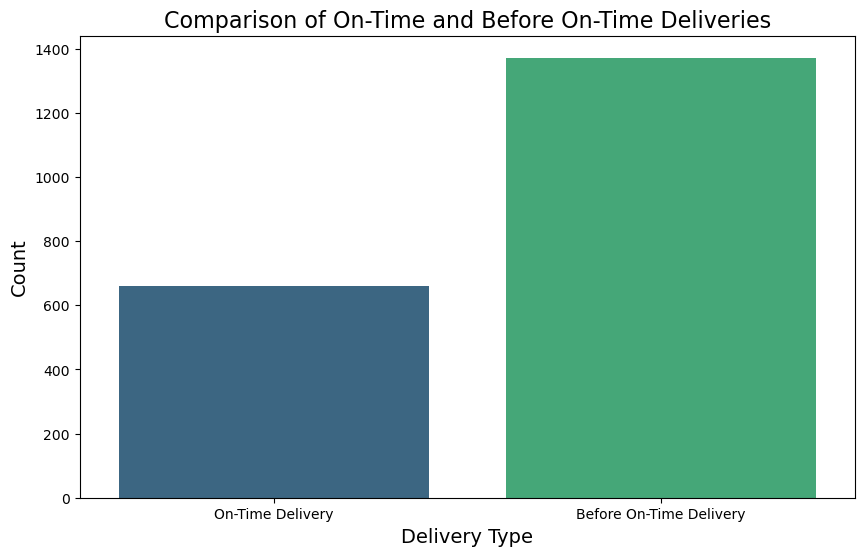

In [205]:
# Visulising on-time and before on-time deliveries
on_time_count = filtered_df['ON_TIME_DELIVERY'].sum()
before_on_time_count = filtered_df['BEFORE_ON_TIME_DELIVERY'].sum()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['On-Time Delivery', 'Before On-Time Delivery'], y=[on_time_count, before_on_time_count], palette='viridis')
plt.xlabel('Delivery Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of On-Time and Before On-Time Deliveries', fontsize=16)
plt.show()

In [206]:
# Create Total_On-Time_Deliveries column combining both conditions as both deliveries are before latest schedule delivery time and date + threshold
filtered_df['Total_On-Time_Deliveries'] = np.where(
    filtered_df['ON_TIME_DELIVERY'] | filtered_df['BEFORE_ON_TIME_DELIVERY'],
    True,
    False
)


In [207]:
#Checking value count for Total_On-Time_Deliveries
Total_Deliveries=filtered_df['Total_On-Time_Deliveries'].value_counts()
Total_Deliveries



True     2033
False    1212
Name: Total_On-Time_Deliveries, dtype: int64

In [208]:
#Adding colimn for late deliveries
filtered_df['LATE_DELIVERY'] = filtered_df['Total_On-Time_Deliveries'] == False# Filter for cases where there is a late delivery and analyze VEHICLE_SIZE
filtered_df.head(10)

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY,BEFORE_ON_TIME_DELIVERY,Total_On-Time_Deliveries,LATE_DELIVERY
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,...,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 09:24:00+00:00,52.316544,-0.157263,2023-10-06 09:24:00+00:00,False,True,True,False
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,...,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00,53.745423,-1.702855,2023-12-20 04:08:00+00:00,False,True,True,False
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,...,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00,51.659889,-0.024926,2023-12-14 10:18:00+00:00,True,False,True,False
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,...,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,52.889862,-0.634389,2023-12-13 17:22:00+00:00,False,False,False,True
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,...,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,55.845446,-3.880531,2023-11-08 03:53:00+00:00,False,False,False,True
5,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-231109-261150,CAUK001009,3.5T Van,LWB Van,NP10 9DQ,DE74 2TR,51.582459,-3.043825,52.829374,...,2023-11-25 12:30:00+00:00,2023-11-25 13:30:00+00:00,2023-11-25 12:54:00+00:00,52.479792,-1.974671,2023-11-25 12:54:00+00:00,True,False,True,False
6,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231120-264422,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,ML1 4UY,52.334853,-1.180450,55.825996,...,2023-12-08 23:00:00+00:00,2023-12-08 23:59:00+00:00,2023-12-09 02:19:00+00:00,55.823052,-3.986801,2023-12-09 02:19:00+00:00,False,False,False,True
7,433732b1-4db6-4969-985d-710c0033eeb4,SEZHUK-231129-267720,CAUK000912,3.5T Van,Box,S35 2PW,LS27 0FU,53.476537,-1.471065,53.734398,...,2023-12-09 05:00:00+00:00,2023-12-09 05:30:00+00:00,2023-12-09 04:23:00+00:00,53.734287,-1.604226,2023-12-09 04:23:00+00:00,False,True,True,False
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231126-266580,CAUK001068,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.763558,-1.739636,51.398851,...,2023-11-27 07:37:00+00:00,2023-11-27 10:33:01+00:00,2023-11-27 12:56:00+00:00,51.398914,-1.231105,2023-11-27 12:56:00+00:00,False,False,False,True
9,433732b1-4db6-4969-985d-710c0033eeb4,SEZHUK-231122-265191,CAUK000912,3.5T Van,Box,BD5 8LZ,LE3 8DX,53.766832,-1.740516,52.641456,...,2023-11-30 02:30:00+00:00,2023-11-30 03:00:00+00:00,2023-11-29 02:26:00+00:00,52.647282,-1.216005,2023-11-29 02:26:00+00:00,False,True,True,False


In [209]:
#Validating the result and comparing it for late deliveries
filtered_df[(filtered_df['ACTUAL_DELIVERY_TIME']>=filtered_df['LAST_DELIVERY_SCHEDULE_LATEST']) & 
            (filtered_df['ON_TIME_DELIVERY']== False)].head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY,BEFORE_ON_TIME_DELIVERY,Total_On-Time_Deliveries,LATE_DELIVERY
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,...,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,52.889862,-0.634389,2023-12-13 17:22:00+00:00,False,False,False,True
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,...,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,55.845446,-3.880531,2023-11-08 03:53:00+00:00,False,False,False,True
6,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231120-264422,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,ML1 4UY,52.334853,-1.180450,55.825996,...,2023-12-08 23:00:00+00:00,2023-12-08 23:59:00+00:00,2023-12-09 02:19:00+00:00,55.823052,-3.986801,2023-12-09 02:19:00+00:00,False,False,False,True
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231126-266580,CAUK001068,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.763558,-1.739636,51.398851,...,2023-11-27 07:37:00+00:00,2023-11-27 10:33:01+00:00,2023-11-27 12:56:00+00:00,51.398914,-1.231105,2023-11-27 12:56:00+00:00,False,False,False,True
11,bad2a1c4-4cf3-4157-864f-ce161784831f,SEZHUK-231102-258924,CAUK000689,Tractor Unit,Curtain-Side 13.6M Trailer,PR7 7NA,NP26 3TS,53.686775,-2.672518,51.572820,...,2023-11-04 10:55:00+00:00,2023-11-04 11:25:00+00:00,2023-11-04 11:58:00+00:00,51.573464,-2.858854,2023-11-04 11:58:00+00:00,False,False,False,True


# Doing EDA

In [210]:
late_Deliveries=filtered_df['LATE_DELIVERY'].value_counts()
late_Deliveries

False    2033
True     1212
Name: LATE_DELIVERY, dtype: int64

In [211]:
# Filter for cases where there is a late delivery and analyse VEHICLE_SIZE
late_delivery_vehicles_size = filtered_df[filtered_df['LATE_DELIVERY']]['VEHICLE_SIZE'].value_counts()
late_delivery_vehicles_size

Tractor Unit    1118
3.5T Van          33
3.5 T Van         30
18T Rigid         20
7.5T Rigid        11
Name: VEHICLE_SIZE, dtype: int64

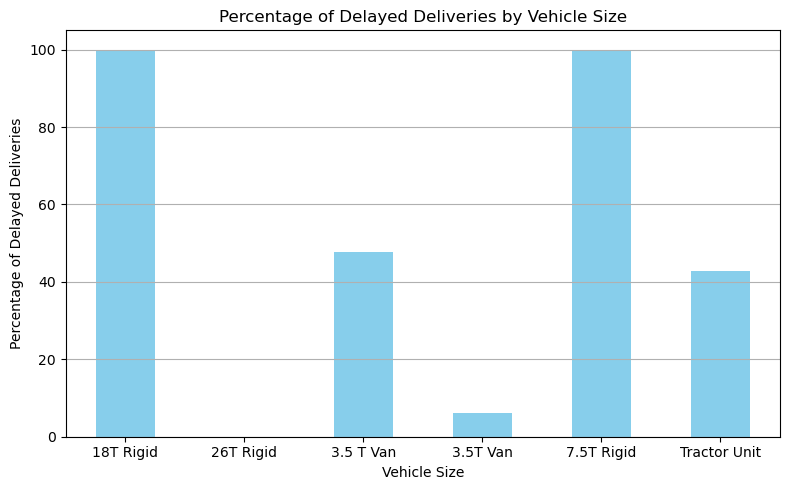

In [212]:
def calculate_distance(row):
    start = (row['FIRST_COLLECTION_LATITUDE'], row['FIRST_COLLECTION_LONGITUDE'])
    end = (row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE'])
    return distance(start, end).miles

# Calculate distance for each row
filtered_df['DISTANCE_MILES'] = filtered_df.apply(calculate_distance, axis=1)

# Calculate delayed deliveries as a percentage by vehicle size
delayed_deliveries = filtered_df.groupby('VEHICLE_SIZE')['LATE_DELIVERY'].mean() * 100

# Plot the results
plt.figure(figsize=(8, 5))
delayed_deliveries.plot(kind='bar', color='skyblue')
plt.title('Percentage of Delayed Deliveries by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Percentage of Delayed Deliveries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [213]:
total_delivery_ontime_vehicles_size = filtered_df[filtered_df['Total_On-Time_Deliveries']]['VEHICLE_SIZE'].value_counts()
total_delivery_ontime_vehicles_size

Tractor Unit    1493
3.5T Van         503
3.5 T Van         33
26T Rigid          4
Name: VEHICLE_SIZE, dtype: int64

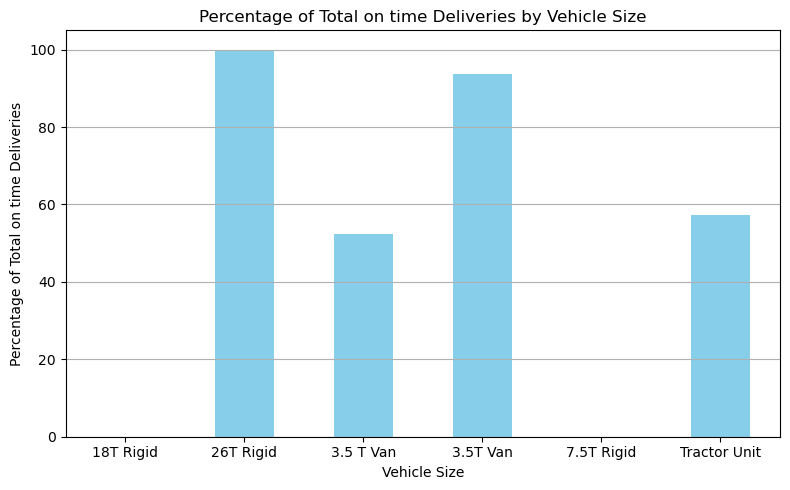

In [214]:
 #Function to calculate distance using geopy
def calculate_distance1(row):
    start = (row['FIRST_COLLECTION_LATITUDE'], row['FIRST_COLLECTION_LONGITUDE'])
    end = (row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE'])
    return distance(start, end).miles

# Calculate distance for each row
filtered_df['DISTANCE_MILES'] = filtered_df.apply(calculate_distance, axis=1)

# Calculate percentage of total deliveries by vehicle size
total_deliveries = filtered_df.groupby('VEHICLE_SIZE')['Total_On-Time_Deliveries'].mean() * 100

# Plot the results
plt.figure(figsize=(8, 5))
total_deliveries.plot(kind='bar', color='skyblue')
plt.title('Percentage of Total on time Deliveries by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Percentage of Total on time Deliveries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [215]:
#Exploring VEHICLE_BUILD_UP
#Calculate late deliveries for each VEHICLE_BUILD_UP
late_delivery_counts = filtered_df[filtered_df['LATE_DELIVERY']].groupby('VEHICLE_BUILD_UP').size()

# Calculate on-time (before or on-time) counts for each VEHICLE_BUILD_UP
ontime_delivery_counts = filtered_df[filtered_df['BEFORE_ON_TIME_DELIVERY']].groupby('VEHICLE_BUILD_UP').size()

# Calculate before time counts for each VEHICLE_BUILD_UP
beforetime_delivery_counts = filtered_df[filtered_df['ON_TIME_DELIVERY']].groupby('VEHICLE_BUILD_UP').size()

# Display the results
print("Late Deliveries:")
print(late_delivery_counts)
print("\nBefore Time Deliveries:")
print(beforetime_delivery_counts)
print("\nOn-time (Before or On-time) Deliveries:")
print(ontime_delivery_counts)

Late Deliveries:
VEHICLE_BUILD_UP
20ft Container                  1
40ft Container                  7
Box                            79
Box 44ft                      201
Curtain Side                   59
Curtain-Side 13.6M Trailer    784
Double Deck Trailer             3
High Security                   1
LWB Van                        44
Temperature-Controlled         16
Tractor Only                   13
Tractor Only 6x2                4
dtype: int64

Before Time Deliveries:
VEHICLE_BUILD_UP
40ft Container                  3
Box                            34
Box 40ft                        1
Box 44ft                      155
Curtain Side                   11
Curtain-Side 13.6M Trailer    294
Double Deck Trailer             1
LWB Van                       131
Temperature-Controlled         12
Tractor Only                   19
dtype: int64

On-time (Before or On-time) Deliveries:
VEHICLE_BUILD_UP
40ft Container                  4
Box                           302
Box 44ft                

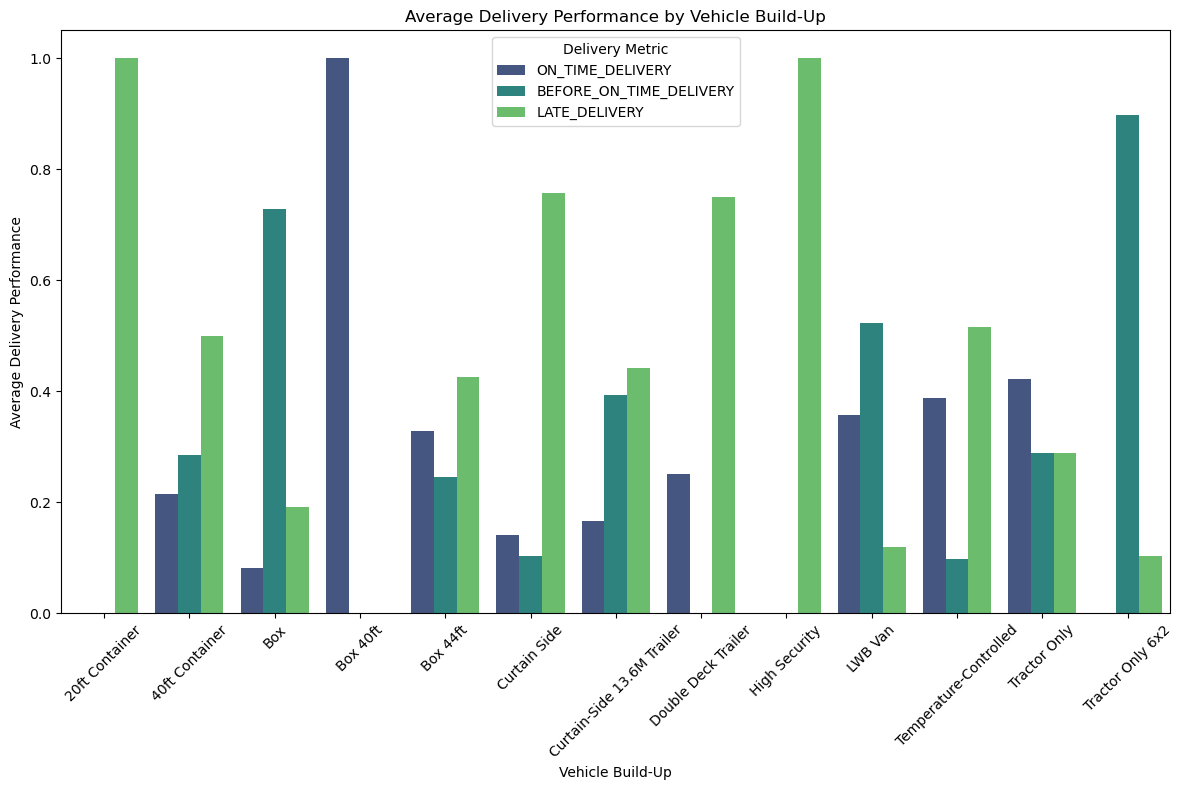

In [216]:
#Calculate average delivery metrics for different levels of VEHICLE_BUILD_UP
avg_delivery_metrics = filtered_df.groupby('VEHICLE_BUILD_UP').agg({
    'ON_TIME_DELIVERY': 'mean',
    'BEFORE_ON_TIME_DELIVERY': 'mean',
    'LATE_DELIVERY': 'mean'
}).reset_index()

# Melt the dataframe for easier plotting with seaborn
avg_delivery_metrics_melted = pd.melt(avg_delivery_metrics, id_vars=['VEHICLE_BUILD_UP'], 
                                      var_name='Delivery_Metric', value_name='Average_Delivery_Performance')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='VEHICLE_BUILD_UP', y='Average_Delivery_Performance', hue='Delivery_Metric',
            data=avg_delivery_metrics_melted, palette='viridis')
plt.title('Average Delivery Performance by Vehicle Build-Up')
plt.xlabel('Vehicle Build-Up')
plt.ylabel('Average Delivery Performance')
plt.xticks(rotation=45)
plt.legend(title='Delivery Metric')
plt.tight_layout()
plt.show()

In [217]:
# Calculate percentage of shipments that met the on-time delivery threshold
total_shipments = filtered_df.shape[0]
on_time_shipments = filtered_df[filtered_df['Total_On-Time_Deliveries']==True].shape[0]
percentage_on_time = (on_time_shipments / total_shipments) * 100


In [218]:
print(f"Percentage of shipments that met the on-time delivery threshold: {percentage_on_time:.2f}%")

Percentage of shipments that met the on-time delivery threshold: 62.65%


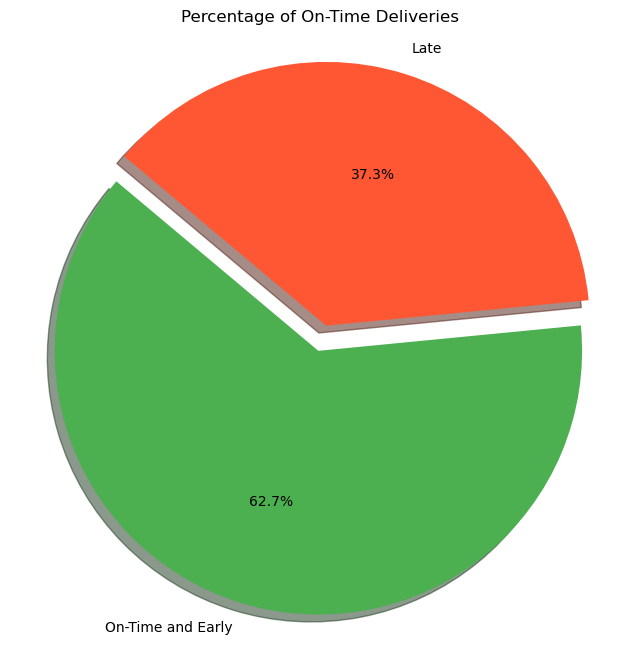

In [219]:
# Pie chart for on-time vs. late deliveries
labels = ['On-Time and Early', 'Late']
sizes = [percentage_on_time, 100 - percentage_on_time]
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of On-Time Deliveries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

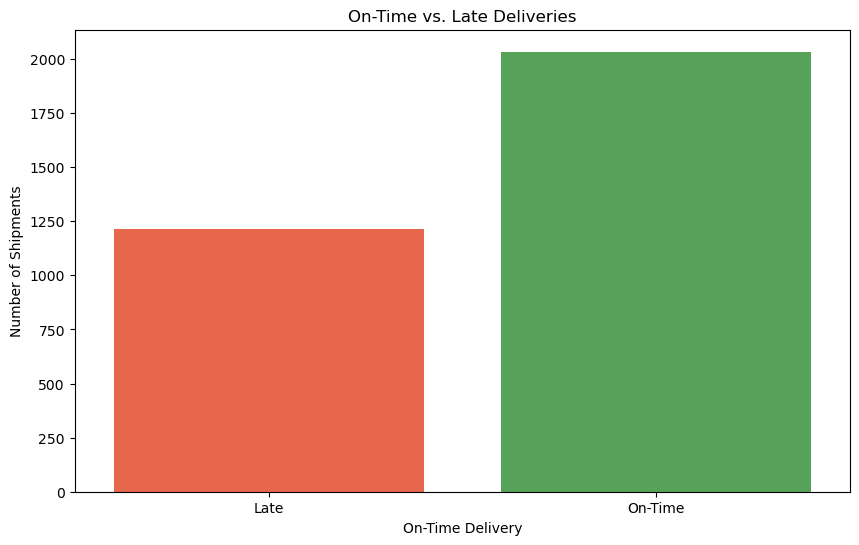

In [220]:
# Bar chart for on-time vs. late deliveries
on_time_delivery_counts = filtered_df['Total_On-Time_Deliveries'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_delivery_counts.index, y=on_time_delivery_counts.values, palette=['#FF5733','#4CAF50'])
plt.xlabel('On-Time Delivery')
plt.ylabel('Number of Shipments')
plt.title('On-Time vs. Late Deliveries')
plt.xticks([0, 1], ['Late', 'On-Time'])
plt.show()

# Task 2
Timely communication of potential delays is crucial for shippers. During the 3-month period from 1st Oct to 31st Dec 2023, which shipper(s) should be notified automatically regarding potential late delivery of which shipments, and at what times?

In [221]:
# Identify potential late deliveries
potential_late_shipments = filtered_df[(filtered_df['ACTUAL_DELIVERY_TIME']>=filtered_df['LAST_DELIVERY_SCHEDULE_LATEST']) & 
            (filtered_df['Total_On-Time_Deliveries']== False)]

In [222]:
potential_late_shipments.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LAST_DELIVERY_SCHEDULE_LATEST,RECORD_TIMESTAMP,LAT,LON,ACTUAL_DELIVERY_TIME,ON_TIME_DELIVERY,BEFORE_ON_TIME_DELIVERY,Total_On-Time_Deliveries,LATE_DELIVERY,DISTANCE_MILES
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,...,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,52.889862,-0.634389,2023-12-13 17:22:00+00:00,False,False,False,True,76.863519
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,...,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,55.845446,-3.880531,2023-11-08 03:53:00+00:00,False,False,False,True,264.714258
6,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231120-264422,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,ML1 4UY,52.334853,-1.180450,55.825996,...,2023-12-08 23:59:00+00:00,2023-12-09 02:19:00+00:00,55.823052,-3.986801,2023-12-09 02:19:00+00:00,False,False,False,True,267.067328
8,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231126-266580,CAUK001068,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.763558,-1.739636,51.398851,...,2023-11-27 10:33:01+00:00,2023-11-27 12:56:00+00:00,51.398914,-1.231105,2023-11-27 12:56:00+00:00,False,False,False,True,164.898909
11,bad2a1c4-4cf3-4157-864f-ce161784831f,SEZHUK-231102-258924,CAUK000689,Tractor Unit,Curtain-Side 13.6M Trailer,PR7 7NA,NP26 3TS,53.686775,-2.672518,51.572820,...,2023-11-04 11:25:00+00:00,2023-11-04 11:58:00+00:00,51.573464,-2.858854,2023-11-04 11:58:00+00:00,False,False,False,True,146.380046


In [223]:
potential_late_shipments.shape

(1212, 24)

In [224]:
potential_late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 3 to 3241
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   PROJECT_ID                          1212 non-null   object             
 1   SHIPMENT_NUMBER                     1212 non-null   object             
 2   CARRIER_DISPLAY_ID                  1212 non-null   object             
 3   VEHICLE_SIZE                        1212 non-null   object             
 4   VEHICLE_BUILD_UP                    1212 non-null   object             
 5   FIRST_COLLECTION_POST_CODE          1212 non-null   object             
 6   LAST_DELIVERY_POST_CODE             1211 non-null   object             
 7   FIRST_COLLECTION_LATITUDE           1212 non-null   float64            
 8   FIRST_COLLECTION_LONGITUDE          1212 non-null   float64            
 9   LAST_DELIVERY_LATITUDE              1212 

In [225]:
# Threshold for sending notification (e.g., 30 minutes before the scheduled latest delivery time)
notification_threshold = pd.Timedelta(minutes=30)

potential_late_shipments['NOTIFICATION_TIME'] = potential_late_shipments['LAST_DELIVERY_SCHEDULE_LATEST']-notification_threshold

In [226]:
#Extract necessary columns for notification
notifications = potential_late_shipments[['SHIPMENT_NUMBER','LAST_DELIVERY_SCHEDULE_LATEST','ACTUAL_DELIVERY_TIME','NOTIFICATION_TIME','ON_TIME_DELIVERY']]

In [227]:
#Validating result
notifications.head()

,SHIPMENT_NUMBER,LAST_DELIVERY_SCHEDULE_LATEST,ACTUAL_DELIVERY_TIME,NOTIFICATION_TIME,ON_TIME_DELIVERY
3,SEZHUK-231211-272127,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00,2023-12-13 15:30:00+00:00,False
4,SEZHUK-231025-256168,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00,2023-11-07 23:29:00+00:00,False
6,SEZHUK-231120-264422,2023-12-08 23:59:00+00:00,2023-12-09 02:19:00+00:00,2023-12-08 23:29:00+00:00,False
8,SEZHUK-231126-266580,2023-11-27 10:33:01+00:00,2023-11-27 12:56:00+00:00,2023-11-27 10:03:01+00:00,False
11,SEZHUK-231102-258924,2023-11-04 11:25:00+00:00,2023-11-04 11:58:00+00:00,2023-11-04 10:55:00+00:00,False


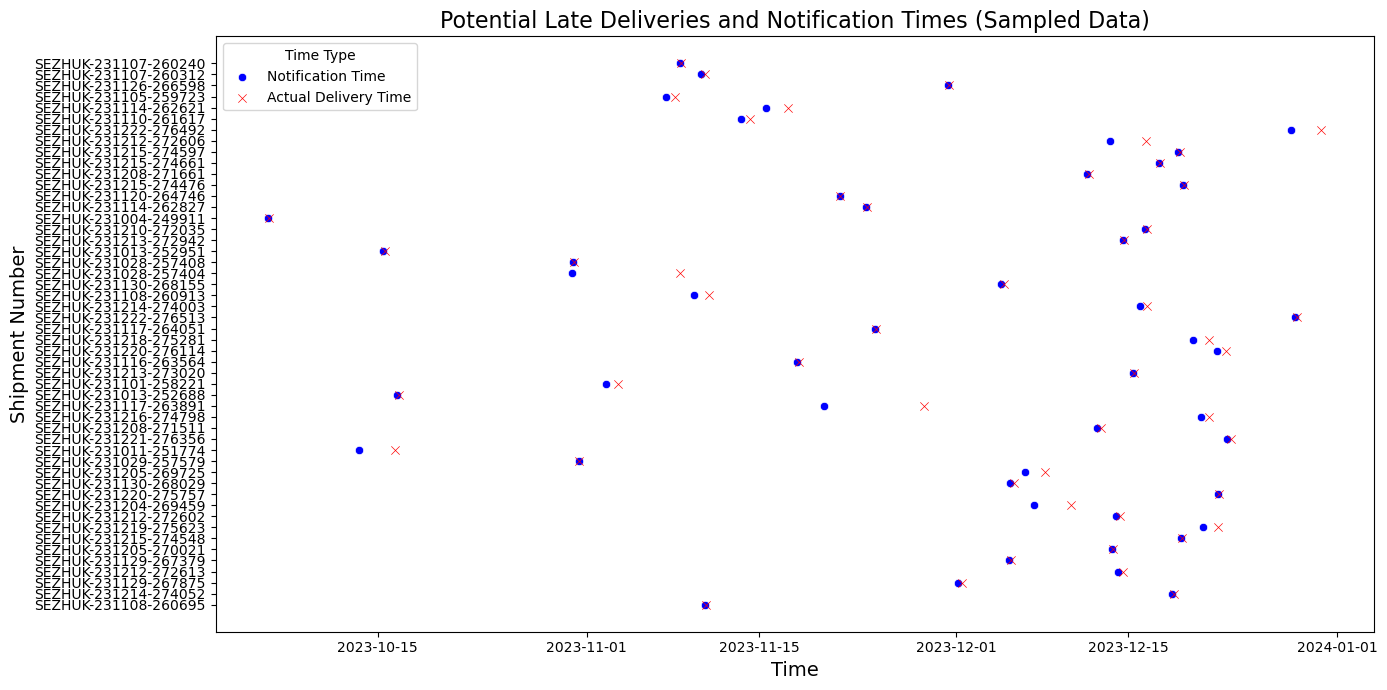

In [228]:
 #Sample data if necessary
sample_size = 50  # Adjust the sample size as needed
if len(notifications) > sample_size:
    notifications_sample = notifications.sample(sample_size, random_state=1)
else:
    notifications_sample = notifications

# Scatter plot for potential late deliveries with a sample
plt.figure(figsize=(14, 7))
sns.scatterplot(data=notifications_sample, x='NOTIFICATION_TIME', y='SHIPMENT_NUMBER', marker='o', color='blue', label='Notification Time')
sns.scatterplot(data=notifications_sample, x='ACTUAL_DELIVERY_TIME', y='SHIPMENT_NUMBER', marker='x', color='red', label='Actual Delivery Time')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Shipment Number', fontsize=14)
plt.title('Potential Late Deliveries and Notification Times (Sampled Data)', fontsize=16)
plt.legend(title='Time Type', loc='upper left')
plt.tight_layout()
plt.show()

In [229]:
# Print notifications as an example (replace with your actual notification method)
if not notifications.empty:
    for index, notification in notifications.iterrows():
        print(f" Shipment {notification['SHIPMENT_NUMBER']} is potentially late. Notification time: {notification['NOTIFICATION_TIME']}")
else:
    print("No potential late deliveries found.")

 Shipment SEZHUK-231211-272127 is potentially late. Notification time: 2023-12-13 15:30:00+00:00
 Shipment SEZHUK-231025-256168 is potentially late. Notification time: 2023-11-07 23:29:00+00:00
 Shipment SEZHUK-231120-264422 is potentially late. Notification time: 2023-12-08 23:29:00+00:00
 Shipment SEZHUK-231126-266580 is potentially late. Notification time: 2023-11-27 10:03:01+00:00
 Shipment SEZHUK-231102-258924 is potentially late. Notification time: 2023-11-04 10:55:00+00:00
 Shipment SEZHUK-230927-247990 is potentially late. Notification time: 2023-10-04 03:00:00+00:00
 Shipment SEZHUK-231211-272331 is potentially late. Notification time: 2023-12-12 15:30:00+00:00
 Shipment SEZHUK-231121-265105 is potentially late. Notification time: 2023-11-23 10:25:00+00:00
 Shipment SEZHUK-230930-249028 is potentially late. Notification time: 2023-10-01 15:57:01+00:00
 Shipment SEZHUK-231211-272240 is potentially late. Notification time: 2023-12-21 13:00:00+00:00
 Shipment SEZHUK-231213-272973